## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [15]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, clone_model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications.vgg16  import VGG16
from keras.applications.vgg19  import VGG19
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras import layers
import tensorflow as tf
from math import sqrt
import seaborn as sns
import matplotlib.image as mpimg

In [16]:
import tensorflow as tf

In [17]:
# Check for TensorFlow GPU access
print(tf.config.list_physical_devices())
# See TensorFlow version
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.8.0


In [18]:
import os
os.chdir('/Users/alyaatmaeva/Desktop/itmo/ML/Tasks/Task 5')

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [19]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = './train'
val =   './val'
test =  './test'
# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes
# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64

# train set size
nb_train_samples = train_generator.n
# validation set size
nb_validation_samples = val_generator.n
# test set size
nb_test_samples = test_generator.n

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [20]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [73]:
model = Sequential()

# 1: +Convolutional
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D((2, 2)))

#  3:  +Convolutional+Relu
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4:  +Pooling 
model.add(MaxPooling2D((2, 2)))

# 5:  +Convolutional
#     +Relu
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6:  +Pooling 
model.add(MaxPooling2D((2, 2)))

# 7:  +Flattening
model.add(Flatten())


# 8:  +Dense
#     +ReLu
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Activation('relu'))

# 9:  +Dropout
model.add(Dropout(0.5))


# 10: +Dense
#     +Sigmoid
model.add(Dense(1, activation='sigmoid'))


In [74]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH
model_10epochs = clone_model(model)
model_10epochs.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


r10 = model_10epochs.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs = 10, 
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
print(r10)

Epoch 1/10


/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/1209454832.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r10 = model_10epochs.fit_generator(
2022-02-23 00:30:57.549728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - ETA: 0s - loss: 0.5963 - accuracy: 0.6630

2022-02-23 00:31:26.031001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - 32s 101ms/step - loss: 0.5963 - accuracy: 0.6630 - val_loss: 0.5083 - val_accuracy: 0.7533
Epoch 2/10
312/312 [==============================] - 34s 108ms/step - loss: 0.4778 - accuracy: 0.7733 - val_loss: 0.4362 - val_accuracy: 0.7981
Epoch 3/10
312/312 [==============================] - 31s 100ms/step - loss: 0.4124 - accuracy: 0.8113 - val_loss: 0.4412 - val_accuracy: 0.7977
Epoch 4/10
312/312 [==============================] - 32s 103ms/step - loss: 0.3658 - accuracy: 0.8395 - val_loss: 0.3953 - val_accuracy: 0.8203
Epoch 5/10
312/312 [==============================] - 32s 103ms/step - loss: 0.3156 - accuracy: 0.8665 - val_loss: 0.3744 - val_accuracy: 0.8326
Epoch 6/10
312/312 [==============================] - 32s 101ms/step - loss: 0.2669 - accuracy: 0.8889 - val_loss: 0.3724 - val_accuracy: 0.8343
Epoch 7/10
312/312 [==============================] - 31s 101ms/step - loss: 0.2115 - accuracy: 0.9127 - val_loss: 0.4168 - val_accuracy: 0.8

In [30]:
model_15epochs = clone_model(model)
model_15epochs.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


r15 = model_15epochs.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, # of epochs: 15;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
print(r15)

Epoch 1/15


/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/937216964.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r15 = model_15epochs.fit_generator(
2022-02-21 19:03:14.114741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - ETA: 0s - loss: 0.5987 - accuracy: 0.6679

2022-02-21 19:03:42.274998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - 32s 100ms/step - loss: 0.5987 - accuracy: 0.6679 - val_loss: 0.5141 - val_accuracy: 0.7397
Epoch 2/15
312/312 [==============================] - 31s 99ms/step - loss: 0.4897 - accuracy: 0.7641 - val_loss: 0.4445 - val_accuracy: 0.7878
Epoch 3/15
312/312 [==============================] - 31s 99ms/step - loss: 0.4175 - accuracy: 0.8119 - val_loss: 0.4203 - val_accuracy: 0.8014
Epoch 4/15
312/312 [==============================] - 31s 99ms/step - loss: 0.3720 - accuracy: 0.8349 - val_loss: 0.3945 - val_accuracy: 0.8137
Epoch 5/15
312/312 [==============================] - 57s 182ms/step - loss: 0.3279 - accuracy: 0.8559 - val_loss: 0.3765 - val_accuracy: 0.8244
Epoch 6/15
312/312 [==============================] - 31s 99ms/step - loss: 0.2739 - accuracy: 0.8838 - val_loss: 0.3687 - val_accuracy: 0.8396
Epoch 7/15
312/312 [==============================] - 31s 100ms/step - loss: 0.2326 - accuracy: 0.9041 - val_loss: 0.3980 - val_accuracy: 0.8396


In [ ]:
scores = model_15epochs.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data (15 epochs): %.2f%%" % (scores[1]*100))

In [75]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model_10epochs.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data (10 epochs): %.2f%%" % (scores[1]*100))
scores = model_15epochs.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data (15 epochs): %.2f%%" % (scores[1]*100))

/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/1033310136.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_10epochs.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data (10 epochs): 84.98%


/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/1033310136.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_15epochs.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data (15 epochs): 83.65%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

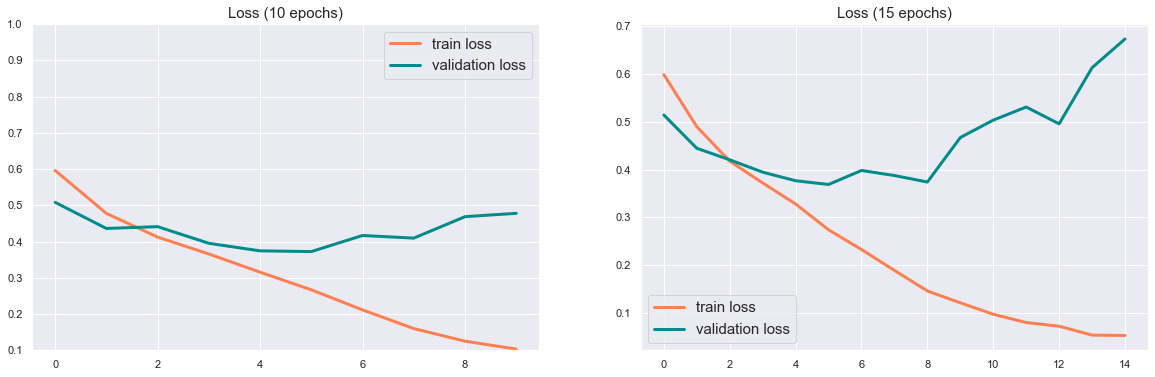

In [77]:
#Loss(Number of epochs)
sns.set_theme(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 6)
)
 
ax1.plot(r3.epoch, r10.history['loss'], label="train loss",linewidth=3.0, color = 'coral')
ax1.plot(r3.epoch, r10.history['val_loss'], label="validation loss", linewidth=3.0, color = 'darkcyan')
ax1.legend(fontsize=15)
ax1.set_ylim(0.1, 1)
ax1.set_title('Loss (10 epochs)',fontsize=15)


ax2.plot(r15.epoch, r15.history['loss'], label="train loss",linewidth=3.0, color = 'coral')
ax2.plot(r15.epoch, r15.history['val_loss'], label="validation loss",linewidth=3.0, color = 'darkcyan')
ax2.legend(fontsize=15)
ax1.set_ylim(0.1, 1)
ax2.set_title('Loss (15 epochs)',fontsize=15)

plt.show()

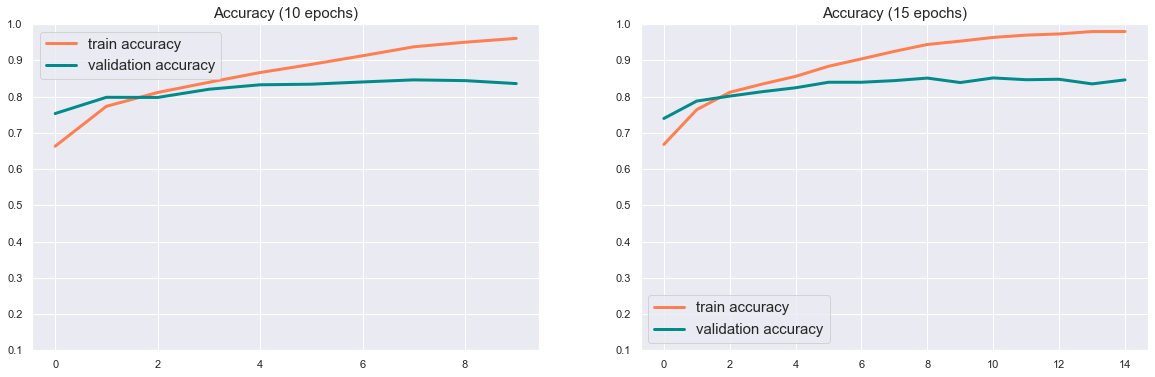

In [78]:
#Loss(Number of epochs)
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
   figsize=(20, 6)
)
 
ax1.plot(r3.epoch, r10.history['accuracy'], label="train accuracy",linewidth=3.0, color = 'coral')
ax1.plot(r3.epoch, r10.history['val_accuracy'], label="validation accuracy", linewidth=3.0, color = 'darkcyan')
ax1.legend(fontsize=15)
ax1.set_ylim(0.1, 1)
ax1.set_title('Accuracy (10 epochs)',fontsize=15)


ax2.plot(r15.epoch, r15.history['accuracy'], label="train accuracy",linewidth=3.0, color = 'coral')
ax2.plot(r15.epoch, r15.history['val_accuracy'], label="validation accuracy", linewidth=3.0, color = 'darkcyan')
ax2.legend(fontsize=15)
ax2.set_ylim(0.1, 1)
ax2.set_title('Accuracy (15 epochs)',fontsize=15)

plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [33]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [34]:
# add layers to VGG16:

model16 = Sequential()
model16.add(vgg16_net)

# + flattening
model16.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model16.add(Dense(256))


# + ReLu
model16.add(layers.ReLU())

# + Dropout
model16.add(layers.Dropout(0.5))

# + Dense layer with 1 neuron
# + sigmoid
model16.add(layers.Dense(1, activation='sigmoid'))

model16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
N

In [35]:
model16.compile(loss ='binary_crossentropy',
              optimizer = Adam(lr=1e-5), 
              metrics = ['accuracy'])

/Users/alyaatmaeva/tensorflow-test/env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


E.g., it was like:


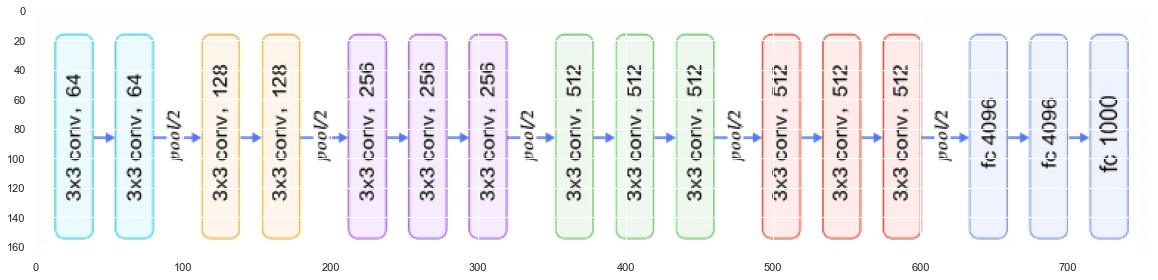

In [36]:
img = mpimg.imread('VGG16.png')
plt.figure(figsize = (20,20))
plt.imshow(img)
plt.show()

and it becomes:

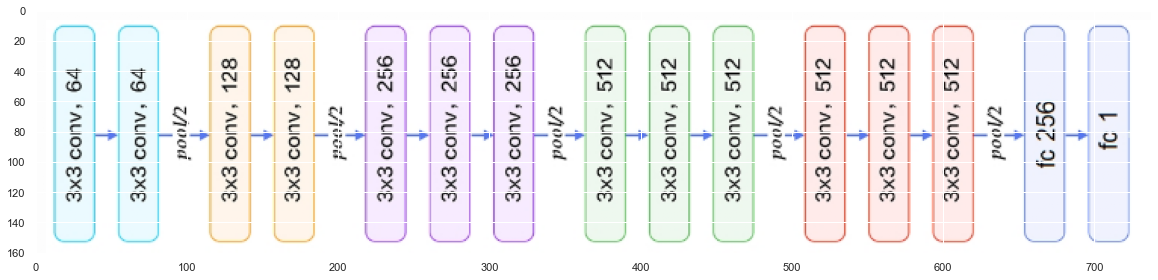

In [59]:
img = mpimg.imread('VGG162.png')
plt.figure(figsize = (20,20))
plt.imshow(img)
plt.show()

In [37]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

rnew3 = model16.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
print(rnew3)

Epoch 1/12


/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/818497922.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  rnew3 = model16.fit_generator(
2022-02-21 20:11:53.022784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - ETA: 0s - loss: 0.5102 - accuracy: 0.7461

2022-02-21 20:14:21.709673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - 167s 532ms/step - loss: 0.5102 - accuracy: 0.7461 - val_loss: 0.3536 - val_accuracy: 0.8635
Epoch 2/12
312/312 [==============================] - 166s 530ms/step - loss: 0.3295 - accuracy: 0.8607 - val_loss: 0.2963 - val_accuracy: 0.8828
Epoch 3/12
312/312 [==============================] - 165s 530ms/step - loss: 0.2872 - accuracy: 0.8802 - val_loss: 0.2742 - val_accuracy: 0.8853
Epoch 4/12
312/312 [==============================] - 170s 546ms/step - loss: 0.2643 - accuracy: 0.8910 - val_loss: 0.2604 - val_accuracy: 0.8931
Epoch 5/12
312/312 [==============================] - 165s 530ms/step - loss: 0.2500 - accuracy: 0.8964 - val_loss: 0.2477 - val_accuracy: 0.8972
Epoch 6/12
312/312 [==============================] - 794s 3s/step - loss: 0.2364 - accuracy: 0.9020 - val_loss: 0.2399 - val_accuracy: 0.9067
Epoch 7/12
312/312 [==============================] - 167s 535ms/step - loss: 0.2273 - accuracy: 0.9058 - val_loss: 0.2336 - val_accuracy:

In [38]:
#Accuracy 

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/134472396.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 84.21%


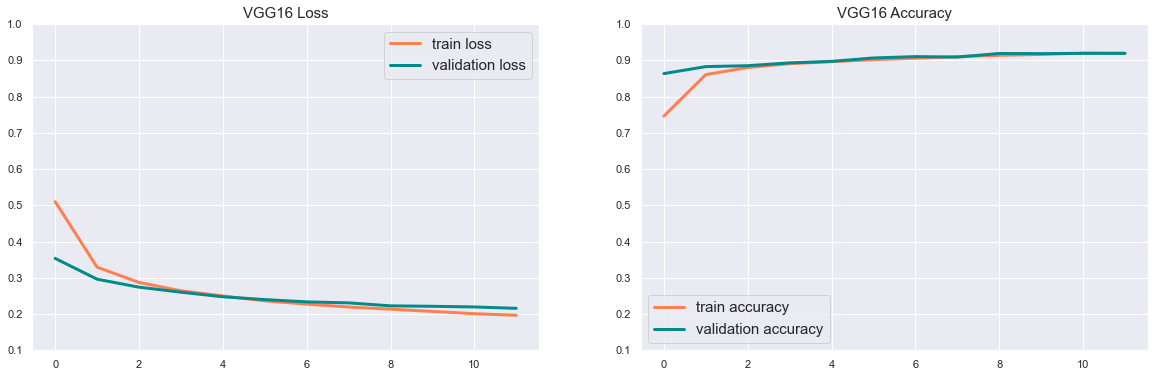

In [48]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 6)
)
 
ax1.plot(rnew3.epoch, rnew3.history['loss'], label="train loss",linewidth=3.0, color = 'coral')
ax1.plot(rnew3.epoch, rnew3.history['val_loss'], label="validation loss", linewidth=3.0, color = 'darkcyan')
ax1.legend(fontsize = 15)
ax1.set_ylim(0.1, 1)
ax1.set_title('VGG16 Loss',fontsize = 15)


ax2.plot(rnew3.epoch, rnew3.history['accuracy'], label="train accuracy",linewidth=3.0, color = 'coral')
ax2.plot(rnew3.epoch, rnew3.history['val_accuracy'], label="validation accuracy", linewidth=3.0, color = 'darkcyan')
ax2.legend(fontsize = 15)
ax2.set_ylim(0.1, 1)
ax2.set_title('VGG16 Accuracy', fontsize = 15)
 
plt.show()

In [40]:
# new model - vgg19

vgg_19_net = VGG19(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg_19_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights RESNET_50 in the process of learning will remain unchanged!

                     # pay attention to the number of trained and untrained parameters         

In [41]:
# add layers to VGG19:

model_19 = Sequential()
model_19.add(vgg_19_net)

# + flattening
model_19.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))


# + ReLu
model_19.add(layers.ReLU())

# + Dropout
model_19.add(layers.Dropout(0.5))

# + Dense layer with 1 neuron
# + sigmoid
model_19.add(layers.Dense(1, activation='sigmoid'))

model_19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 re_lu_1 (ReLU)              (None, 8192)              0         
                                                                 
 dropout_3 (Dropout)         (None, 8192)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 20,032,577
Trainable params: 8,193
Non-trainable params: 20,024,384
_________________________________________________________________


In [42]:
model_19.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])

In [43]:
# train the model VGG19

rnew_vgg19 = model_19.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)
print(rnew_vgg19)

Epoch 1/12


/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/1373701345.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  rnew_vgg19 = model_19.fit_generator(
2022-02-21 21:17:02.802877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - ETA: 0s - loss: 0.8023 - accuracy: 0.5094

2022-02-21 21:20:02.648087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


312/312 [==============================] - 202s 644ms/step - loss: 0.8023 - accuracy: 0.5094 - val_loss: 0.6668 - val_accuracy: 0.5851
Epoch 2/12
312/312 [==============================] - 229s 734ms/step - loss: 0.7073 - accuracy: 0.5710 - val_loss: 0.6021 - val_accuracy: 0.6994
Epoch 3/12
312/312 [==============================] - 228s 732ms/step - loss: 0.6271 - accuracy: 0.6448 - val_loss: 0.5562 - val_accuracy: 0.7516
Epoch 4/12
312/312 [==============================] - 217s 696ms/step - loss: 0.5760 - accuracy: 0.6966 - val_loss: 0.5181 - val_accuracy: 0.7825
Epoch 5/12
312/312 [==============================] - 216s 692ms/step - loss: 0.5371 - accuracy: 0.7319 - val_loss: 0.4890 - val_accuracy: 0.8055
Epoch 6/12
312/312 [==============================] - 209s 670ms/step - loss: 0.5018 - accuracy: 0.7634 - val_loss: 0.4676 - val_accuracy: 0.8117
Epoch 7/12
312/312 [==============================] - 206s 659ms/step - loss: 0.4766 - accuracy: 0.7829 - val_loss: 0.4480 - val_accura

In [44]:
#Accuracy 

scores = model_19.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/j_/c1mf9sp16w189s8lq8qh8ms00000gn/T/ipykernel_76447/912120547.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_19.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 82.17%


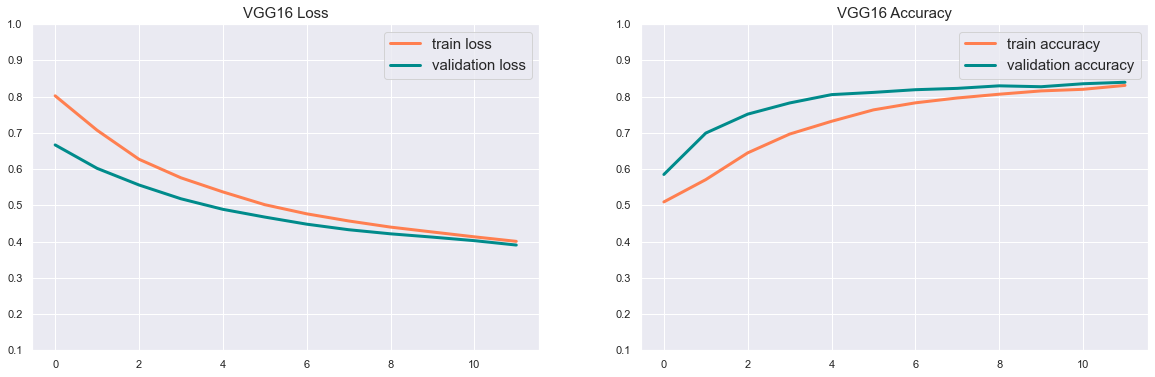

In [47]:

fig, (ax1, ax2) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(20, 6)
)
 
ax1.plot(rnew_vgg19.epoch, rnew_vgg19.history['loss'], label="train loss",linewidth=3.0, color = 'coral')
ax1.plot(rnew_vgg19.epoch, rnew_vgg19.history['val_loss'], label="validation loss", linewidth=3.0, color = 'darkcyan')
ax1.legend(fontsize = 15)
ax1.set_ylim(0.1, 1)
ax1.set_title('VGG16 Loss',fontsize = 15)


ax2.plot(rnew_vgg19.epoch, rnew_vgg19.history['accuracy'], label="train accuracy",linewidth=3.0, color = 'coral')
ax2.plot(rnew_vgg19.epoch, rnew_vgg19.history['val_accuracy'], label="validation accuracy", linewidth=3.0, color = 'darkcyan')
ax2.legend(fontsize = 15)
ax2.set_ylim(0.1, 1)
ax2.set_title('VGG16 Accuracy', fontsize = 15)
 
plt.show()

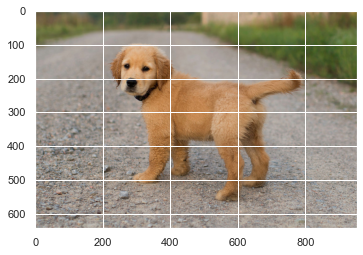

In [138]:
# Check the models

dog = mpimg.imread('./log/puppy-dog.jpg')
imgplot = plt.imshow(dog)
plt.show()

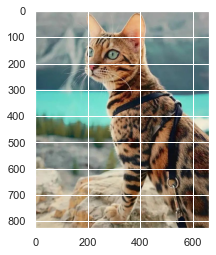

In [183]:
cat = mpimg.imread( './log/cat2.jpeg')
imgplot = plt.imshow(cat)
plt.show()

In [184]:
dog = tf.image.resize(dog, [150, 150],method='nearest')
cat= tf.image.resize(cat, [150, 150],method='nearest')
test_dog = image.img_to_array(dog_new)
test_dog = np.expand_dims(test_dog,axis=0)
test_cat = image.img_to_array(cat)
test_cat = np.expand_dims(test_cat,axis=0)

if >=0.5 - dog, else - cat

In [185]:
test_dog_10epochs = model_10epochs.predict(test_dog)
test_dog_15epochs = model_15epochs.predict(test_dog)
test_dog_vgg16 = model_19.predict(test_dog)
test_dog_vgg19 = model16.predict(test_dog)

print("10 epochs", test_dog_10epochs[0][0])
print("15 epochs", test_dog_15epochs[0][0])
print("vgg16 - 15 epochs", test_dog_vgg16[0][0])
print("vgg19 - 15 epochs", test_dog_vgg19[0][0])

10 epochs 1.0
15 epochs 1.0
vgg16 - 15 epochs 1.0
vgg19 - 15 epochs 1.0


all models predict dog 

In [186]:
test_cat_10epochs = model_10epochs.predict(test_cat)
test_cat_15epochs = model_15epochs.predict(test_cat)
test_cat_vgg16 = model_19.predict(test_image2)
test_cat_vgg19 = model16.predict(test_cat)

print("10 epochs", test_cat_10epochs[0][0])
print("15 epochs", test_cat_15epochs[0][0])
print("vgg16 - 15 epochs", test_cat_vgg16[0][0])
print("vgg19 - 15 epochs", test_cat_vgg19[0][0])

10 epochs 0.0
15 epochs 1.0
vgg16 - 15 epochs 0.0
vgg19 - 15 epochs 1.08249695e-30


1,3,4 predict cat, 2 - dog